# Projektaufabe Wärmeleitung von Mauro Schegg

**Erstellt am:** 
- 19.11.2024

**Die zwei Simulationsparameter:**
- $r_i = 2.5~cm, r_a  = 4.5~cm$

## 1. Rohr-Isolation:

**Geg.:**
- $r_i = 0.025~\text{m}$ Innenradius

- $r_a  = 0.045~\text{m}$ Aussenradius

- $T(r_i) = T_i = 80~\text{°C}$ Dirichlet innen

- $T_a = 20~\text{°C}$ Konvektiontemperatur aussen

- $h = 5~\frac{\text{W}}{\text{m}^2 \cdot \text{K}}$ Wärmeübergangskoeffizient

- $k = 0.5~\frac{\text{W}}{\text{m} \cdot \text{K}}$ Wärmeleitfähigkeit

### Aufgabe 1 Handrechnung:

**Geg.:**
- $T(r)  = A~\text{ln}(\frac{r}{r_i}) + B$ 
- $r = [r_i,r_a] = [0.025~\text{m},0.045~\text{m}] $

**Ges.:**
- Lösung $T(r)$

**Visualisierung:**

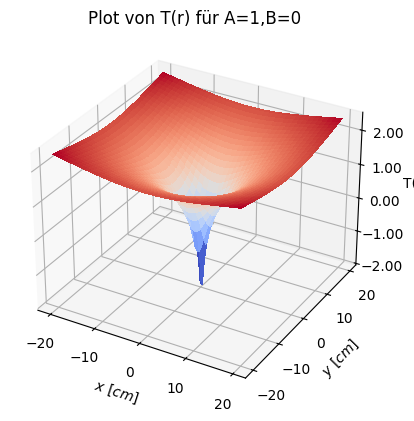

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ri = 2.5  # Innenradius [cm]

# Einstellungen für die Anzeige
X = np.arange(-20, 20, 0.25)
# Ohne null wegen des ln
X = X[X != 0]
Y = np.arange(-20, 20, 0.25)
Y = Y[Y != 0]
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
T = np.log(R / ri)

# Plot der Figur
surf = ax.plot_surface(X, Y, T, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter("{x:.02f}")

ax.set_xlabel("$x~[cm]$")
ax.set_ylabel("$y~[cm]$")
ax.set_zlabel("T(r)")
plt.title("Plot von T(r) für A=1,B=0")
plt.show()

Erkenntnis durch die Visualisierung: 
- Der natürliche Logarithmus würde das Problem für einen Radius gegen 0 unphysikalisch machen, da die Temperatur gegen minus unendlich gehen würde. Der Radius ist jedoch beim Innenradius begrenzt, was zu keinem Problem führt $\text{ln}(1) = 0.$ 

**Rechnung:**

Berechnung von B mit Randbedingung 1:

$$\text{RB1:}~T(r_i) = 353~\text{K} $$
$$T(r_i)  = A \cdot \text{ln}(\frac{r_i}{r_i})+B = 353~\text{K} => B = 353~\text{K}$$
$$T(r_a)  = A \cdot\text{ln}(\frac{r_a}{r_i})+ 353~\text{K}$$

Berechnung der Wärmestromdichten:
$$q_{conv} = -h \cdot (T_a-T(r_a))$$
$$q_{cond} = -k \cdot \frac{\partial{T}}{\partial{r}}$$

Berechnung von A für $r_a = 0.045~\text{m}$ mit Randbedingung 2:
$$\text{RB2:}~q_{cond}~|_{r_a} = q_{conv} $$
$$-k \cdot \frac{\partial{T}}{\partial{r}}~|_{r_a} = -h(T_a-T(r_a)) $$
$$-k \cdot A \cdot \frac{1}{r_a} = -h(T_a-A \cdot\text{ln}(\frac{r_a}{r_i})-353~\text{K})$$
$$A= \frac{-h \cdot 60~\text{K}}{h \cdot \text{ln}(\frac{r_a}{r_i})+\frac{k}{r_a}} = -21.4~\text{K}$$

**Lösung:**
- $T(r) = -21.4~\text{K} \cdot \text{ln}(\frac{r}{r_i}) + 353.15~\text{K}$

**Visualisierung der Lösung:**

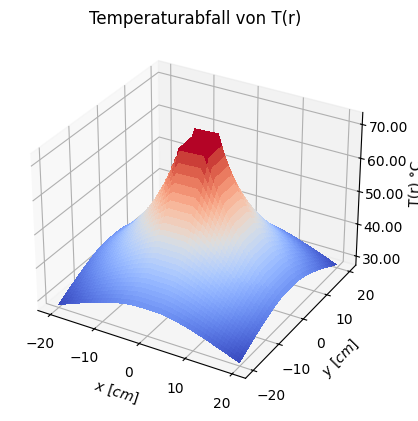

In [2]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ri = 0.025  # Innenradius [m]

# Einstellungen für die Anzeige

x1 = np.arange(0.025, 0.2, 0.001)
x2 = np.arange(-0.20, -0.025, 0.001)

y1 = np.arange(0.025, 0.2, 0.001)
y2 = np.arange(-0.20, -0.025, 0.001)

Y = np.concatenate([y2, y1])
X = np.concatenate([x2, x1])
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
T = -21.4 * np.log(R / ri) + 80

# Plot der Figur
surf = ax.plot_surface(X*100, Y*100, T, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter("{x:.02f}")

ax.set_xlabel("$x~[cm]$")
ax.set_ylabel("$y~[cm]$")
ax.set_zlabel("T(r) °C")
plt.title("Temperaturabfall von T(r)")
plt.show()

Text(0.5, 1.0, 'Temperaturverlauf mit Handrechnung')

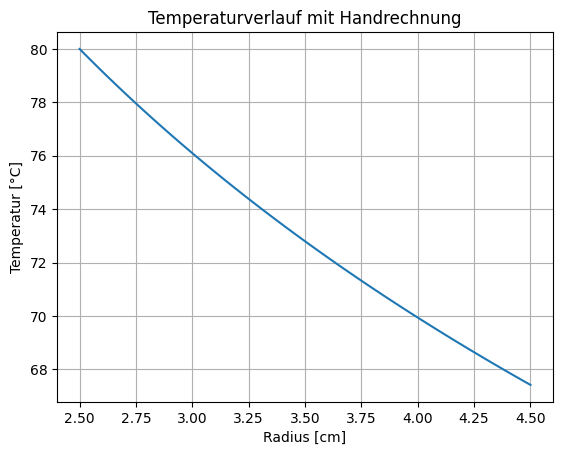

In [3]:
T = lambda r: -21.4 *np.log(r/0.025)+80
r = np.linspace(0.025,0.045)
plt.plot(r*100,T(r))
plt.grid()
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.title("Temperaturverlauf mit Handrechnung")

Für die bessere Visualiserung der Funktion ist sie hier einmal mit einer Isolation mit $r_a =  1~\text{m} $ dargestellt.

Wir beobachten, dass die Temperatur für grosse $r_a$ unter $T_a$ sinkt, dies würde in der Realität nicht passieren. Es liegt daran das A für das verwendete T(r) am Arbeitspunkt $r_a = 0.045~\text{m}$ berechnet wurde. Deshalb stimmt es am besten in dessen Umgebung. Wird $T(r)$ bei $r_a = 1~\text{m}$ berechnet ist die Lösung $T(r) = -16.22 \cdot ln(\frac{r_a}{r_i}+353.15~\text{K}).$   

Die Temperatur bei AP= 1m am Rand ist 20.163°C


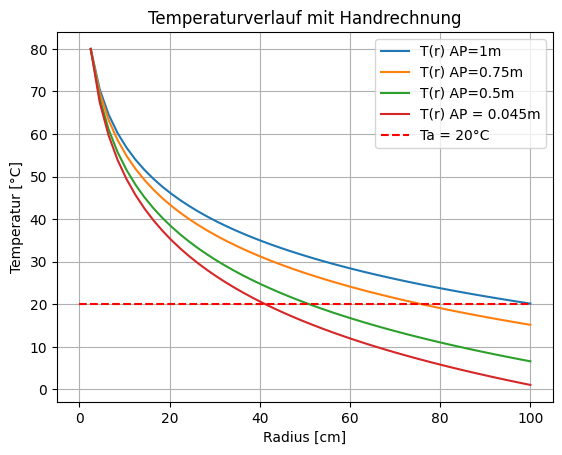

In [4]:
# T(r) beim Arbeitspunkt ra = 1 m
T1 = lambda r: -16.221 *np.log(r/0.025)+80
# T(r) beim Arbeitspunkt ra = 0.5 m
T5 = lambda r: -19.8957 *np.log(r/0.025)+80
# T(r) beim Arbeitspunkt ra = 0.75 m
T75 = lambda r: -17.572 *np.log(r/0.025)+80
# ra von ri bis 1m
r1 = np.linspace(0.025,1)
plt.plot(r1*100,T1(r1),label="T(r) AP=1m")
plt.plot(r1*100,T75(r1),label="T(r) AP=0.75m")
plt.plot(r1*100,T5(r1),label="T(r) AP=0.5m")
plt.plot(r1*100,T(r1),label="T(r) AP = 0.045m")
plt.hlines(y=20,xmin=0,xmax=100,colors="red",linestyles="--",label=f"Ta = 20°C")
# Ausgabe der Randtemperatur.
print(f"Die Temperatur bei AP= 1m am Rand ist {round(min(T1(r1)),3)}°C")
plt.grid()
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.title("Temperaturverlauf mit Handrechnung")
plt.legend()

### Aufgabe 2 Comsol 1D Axialsymmetrisch:

In [5]:
# Einlesen der Daten mit pandas
import pandas as pd
df1 = pd.read_csv("Daten/Daten1D.csv",sep=";")

Text(0.5, 1.0, 'Temperaturverlauf 1D Axialsymmetrisch')

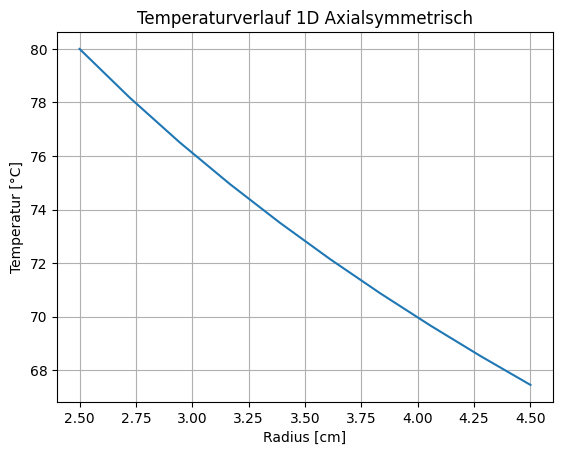

In [6]:
# Plot des Temperaturverlaufes
plt.plot(df1["R"]*100,df1["T"])
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.grid()
plt.title("Temperaturverlauf 1D Axialsymmetrisch")

### Aufgabe 3 Comsol 2D:

In [7]:
df2 = pd.read_csv("Daten/Daten2D.csv",sep=";")

Text(0.5, 1.0, 'Temperaturverlauf 2D entlang einem radial Strich')

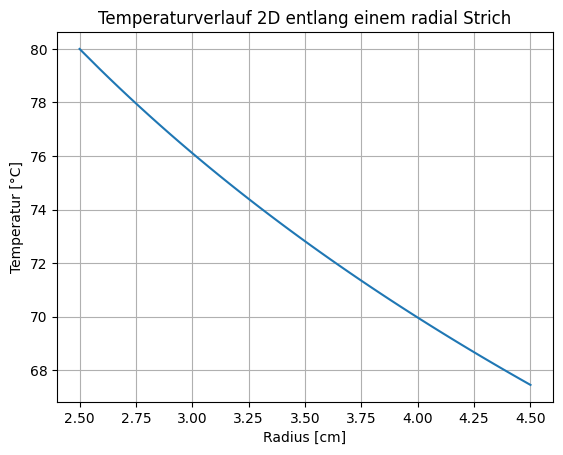

In [8]:
plt.plot(df2["R"]*100,df2["T"])
plt.grid()
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.title("Temperaturverlauf 2D entlang einem radial Strich")

### Aufgabe 4 Vergleich der drei Kurven:

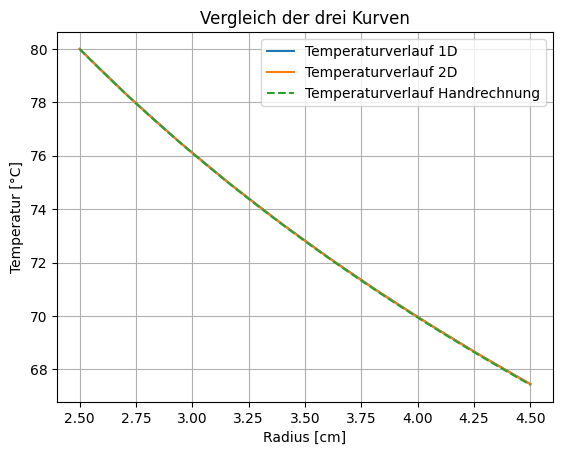

In [9]:
# Plot des Temperaturverlaufs der drei Bestimmungsweg zusammen
plt.plot(df1["R"]*100,df1["T"],label="Temperaturverlauf 1D")
plt.plot(df2["R"]*100,df2["T"],label="Temperaturverlauf 2D")
plt.plot(r*100,T(r),linestyle="--",label="Temperaturverlauf Handrechnung")
plt.grid()
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.title("Vergleich der drei Kurven")
plt.legend()

In [10]:
from sklearn.metrics import r2_score
from scipy.interpolate import interp1d

# Interpolieren von Daten1D auf die x-Werte von Daten2D
interpolator = interp1d(df1["R"], df1["T"], kind='linear', fill_value='extrapolate')
y1_interp = interpolator(df2["R"])
y1_interp = np.array(y1_interp)


In [11]:
# 
x1 = np.linspace(0.025,0.045,len(df1["R"]))
x2 = np.linspace(0.025,0.045,len(df2["R"]))
T1 = T(x1)
T2 = T(x2)

**Bestimmtheitsmass:**

In [12]:
# Vergleich 1D und 2D
r21 = r2_score(y1_interp,df2["T"])
r21

0.9999939333529381

In [13]:
# Vergleich Hand und 1D
r22 = r2_score(T1,df1["T"])
r22

0.9999804581575854

In [14]:
# Vergleich Hand und 2D
r23 = r2_score(T2,df2["T"])
r23

0.997825026940608

- Mann erkennt das die einzelnen Linien nicht voneinander zu unterscheiden sind.
- Das hohe Bestimmtheitsmass sagt aus das die Linien einen sehr ähnlichen Verlauf haben.

### Aufgabe 5:

Fouriesches Gesetz:

- $\dot{Q} =  -k \cdot F \cdot \frac{\partial T}{\partial r} $ Wärmefluss $[\frac{W}{m}]$
- $F(r) = 2 \cdot \pi \cdot r \cdot l$ $[m^2]$ Oberfläche durch die Wärme fliesst. 
Da der Wärmefluss konstant ist und die Oberfläche sich mit r ändert muss die Temperaturänderung $\frac{\partial T}{\partial r}$ von innen nach aussen mit $\frac{1}{r}$ abnehmen.

$$\partial T = \frac{\dot{Q}}{k\cdot F}~\partial r$$

$$\int_{T_i}^{T_2} 1 \,dT  = \frac{-\dot{Q}}{k 2 \pi l} \int_{r_i}^{r_a} \frac{1}{r} \, dr~\text{mit}~\dot{Q} = \text{const.}, k = \text{const.}$$

$$\Delta T = - \frac{-\dot{Q}}{2  \pi k l} (\text{ln}(r_a)-\text{ln}(r_i))$$

$$
\dot{Q} = -\frac{2 \pi k l \Delta T}{\ln\left(\frac{r_a}{r_i}\right)}
$$

**Wärmefluss pro m:** (mit l = 1m dividieren)
$$
q_r = -\frac{2 \pi k \Delta T}{\ln\left(\frac{r_a}{r_i}\right)}
$$


Wie so ist $\dot{Q} = \text{const.}$?
- Wenn der Wärmefluss durch die einzelnen Zwischenebenen unten in der Abbildung ersichtlich nicht konstant wäre, so würde es zu einer Abkühlung oder Erwärmung einzelner Ebenen führen. Was bedeuteten würde das Problem ist nicht mehr stationär wäre.

![Alternativtext](./Bilder/Zwischeneben.png)

[Quelle für das Bild:](https://www.tec-science.com/de/thermodynamik-waermelehre/waerme/temperaturverlaufe-und-warmestrome-durch-verschiedene-geometrien/)

#### Analytisch:

In [15]:
ri = 0.025 # [m] Innendurchmesser
h = 5 # [W/(m^2*K)] Wärmeübertragungskoeffizient
Ti = 353.15 # [K] Randbedingung innen
Ta = 293.15 # [K] Umgebungdtemperatur
k = 0.5 # [W/(m*K)] Wärmeleitfähigkeit

- $A = \frac{-h \cdot 60}{h \cdot \text{ln}(\frac{r_a}{r_i})+\frac{k}{r_a} }$

- $ q =  \frac{-k \cdot A}{r_a}$

- $
q_r = \frac{2 \pi k \Delta T}{\ln\left(\frac{r_a}{r_i}\right)}
$

- $\Delta{T} = T_{r_a}-T_{r_i} = A \cdot \text{ln}(\frac{r_a}{r_i}) + 353.15~\text{K} - 353.15~\text{K} =   A \cdot \text{ln}(\frac{r_a}{r_i}) $


In [16]:
# Funktion für die Berechnung von A für ein ra
A_cal = lambda ra: (-h*60)/(h*np.log(ra/ri)+k/ra) 

# Funktion für die Berechnung der Wärmestromdichte mit ra und A
q_cal = lambda A,ra: -k*A/ra

# Wärmefluss pro Längeneinheit
qr_dot_cal = lambda delT,ra: -2*np.pi*delT*k/(np.log(ra/ri))

# Berechnug der Temperaturdifferenz
delT_cal = lambda A,ra: A*np.log(ra/ri)

# ra von 0.0251 m bis 0.2 m
ra = np.linspace(0.0251,0.2,1000)

# Bestimmung der Werte des A Parameters
A = A_cal(ra)

# Berechnung DeltaT
delT = delT_cal(A,ra)

# Berechnung Wärmefluss pro Längeneinheit
qr_dot = qr_dot_cal(delT,ra)

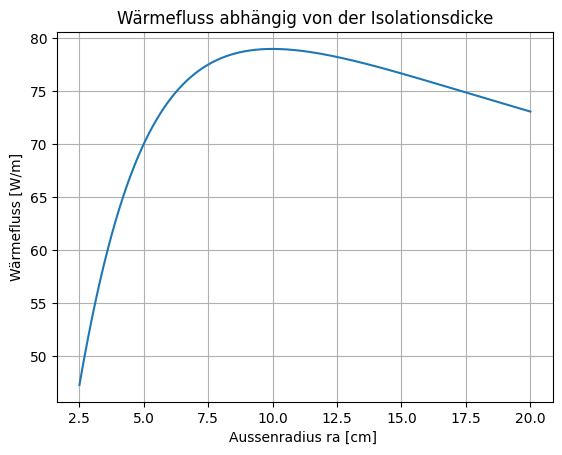

In [17]:
plt.plot(ra*100,qr_dot)
plt.ylabel("Wärmefluss [W/m]")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Wärmefluss abhängig von der Isolationsdicke")
plt.grid()

### Aufgabe 6:

**Biot-Zahl:**
- Die Biot-Zahl gibt bei Wärmetransport durch die Oberfläche das Verhältnis des Wärmeleitwiderstandes des Körpers zum Wärmeübergangswiderstand des umgebenden Mediums an. 
- Bi < 1: Konvektion ist dominant;
- Bi ≈ 1: keine dominante Wärmeübertragung;
- Bi > 1: Wärmeleitung ist dominant.


- $L = \frac{\text{Volumen}}{\text{Oberfläche durch die Wärme Strömt}} = \frac{r^2 \cdot \pi \cdot l}{2 \cdot r\cdot \pi \cdot l } = \frac{r}{2}$

**Berechnungsart 1:** Für die Randoberfläche
- $Bi = \frac{h \cdot L}{k} = \frac{h \cdot \frac{r_a}{2}}{k}$
 $$q_r = \frac{\Delta T \cdot \pi \cdot h \cdot r_a}{\text{ln}(r_a/r_i) \cdot Bi}$$
**Da wir nur die Biot-Zahl am Rand betrachten können wir diese Verwenden!**

**Berechnugsart 2:** Biot-Zahl für den Körper da die Oberfläche durch die Wärme tritt nicht konstant ist.
- $Bi = \frac{R_{th}}{R_s}$ definiert ist. Wobei $R_{th}$ der Wärmewiderstand in $[\frac{K}{W}]$ und $R_s$ der Wärmeübergangswiderstand in $[\frac{K}{W}]$ sind.
$$R_{th} = \frac{\text{ln}(r_a/r_i)}{2 \pi L k}$$
$$R_s = \frac{1}{2 \pi \cdot r_a \cdot L \cdot h}$$
Daraus würde sich die Biot-Zahl
$$Bi = \frac{\text{ln}(r_a/r_i) \cdot r_a \cdot h}{k}$$

**Bestimmung der Charakteristischen Länge:**


In [18]:
# ra von 0.0251 m bis 2m
ra2 = np.linspace(0.0251,2*1,1000)

# Charakteristische Länge (Maximale Temperaturdifferenz)
L = ra2

# Berechnung der Biot-Zahl 
Bi_cal = lambda L: h*(L/2)/k
Bi = Bi_cal(L)
Bi[-1]

np.float64(10.0)

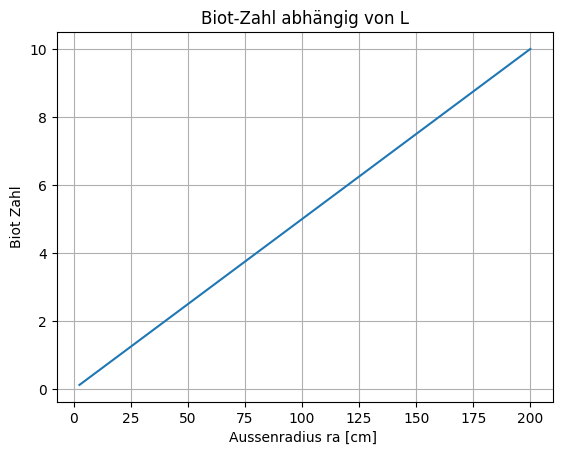

In [19]:
plt.plot(ra2*100,Bi)
plt.ylabel("Biot Zahl")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Biot-Zahl abhängig von L")
plt.grid()

In [20]:
A2 = A_cal(ra2)
delT2 = delT_cal(A2,ra2)

In [21]:
# Wärmefluss pro Längeneinheit mit Biot-Zahl
qr_dot_cal2 = lambda delT,ra,Bi: (-delT*np.pi*ra*h)/(np.log(ra/ri)*Bi)
qr_dot2 = qr_dot_cal2(delT2,ra2,Bi)

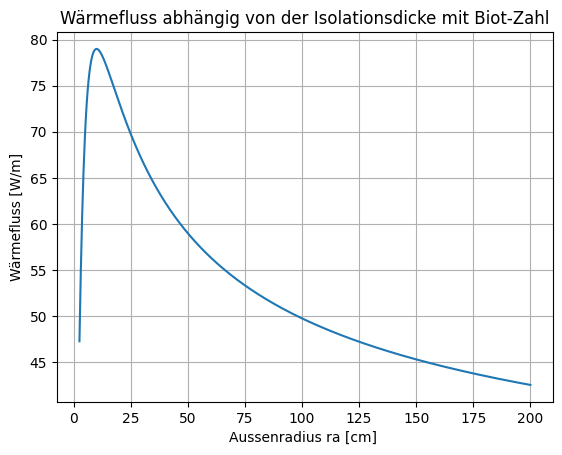

In [22]:
plt.plot(ra2*100,qr_dot2)
plt.ylabel("Wärmefluss [W/m]")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Wärmefluss abhängig von der Isolationsdicke mit Biot-Zahl")
plt.grid()

### Aufgabe 7:

In [23]:
# Bestimmen des Maximums mit Aufgabe 6:
maxQ2 = np.max(qr_dot2)
index = np.argmax(qr_dot2)
print(maxQ2,len(qr_dot2))

78.99082753374738 1000


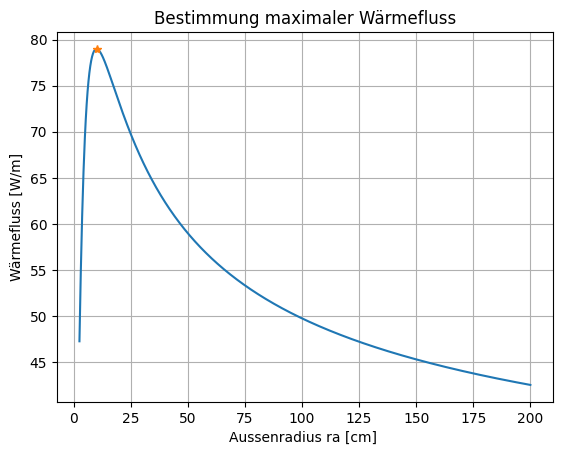

In [24]:
plt.plot(ra2*100,qr_dot2)
plt.plot((index+12.5)*0.2,maxQ2,"*")
plt.ylabel("Wärmefluss [W/m]")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Bestimmung maximaler Wärmefluss")
plt.grid()

- Der maximale Wärmefluss mit 79 $[\frac{W}{m}]$  bei $r_a = 10~\text{[cm]}$ 

#### Überprüfung:
Wiso entsteht dieser Kritische Radius?:
- Je dicker die Isolation desto besser ist die Isolation, aber auch die Oberfläche wächst mit der Dicke der Isolation $\rarr$ höhere Konvektion.
$$R = (\frac{\text{ln}(r_a/r_i)}{2 \pi L k}+\frac{1}{2 \pi r_a L h})~\text{Wärmewiderstand}$$ 
**Extremstelle Aufsuchen:**
$$\frac{\partial R}{\partial r_a} = 0 \rarr r_{krit} = \frac{k}{h} = 0.1~\text{m} = 10~\text{cm} $$
[Quelle der Formel](https://n.ethz.ch/~jgeurts/dateien/zusammenfassungen/Thermodynamik_II_Zusammenfassung.pdf)